In [71]:
#some imports to get you going

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

## Part 1: Data exploration and preprocessing

In [74]:
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv("UniversalBank_unprocessed.csv")

#Initial exploration
print("Shape of the dataset :", df.shape )

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nInfo about each column:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

#Counting how many people accepted the loan
print("\n Value counts for target variable (Personal Loan) : ")
print(df['Personal Loan'].value_counts())

#Checking if any columns are strongly correlated (>= 0.9 or <= -0.9)
print("\nStrongly correlated features (>= 0.9 or <= -0.9):")
corr_matrix = df.corr(numeric_only=True)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= 0.9:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_value}")

# Dropping unnecessary columns
# 'ID' is just a unique identifier, not useful for prediction
df = df.drop(columns=['ID'])

#Filling missing values (using median)
df['Experience'] = df['Experience'].fillna(df['Experience'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

#Converting categorical variable 'Education' into dummy variables
df = pd.get_dummies(df, columns=['Education'], drop_first=True)

#Separating features (X) and target (y)
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

#Scaling the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Converting scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
# inal output to confirm everything is ready
print("\nPreprocessing complete!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Shape of the dataset : (1117, 12)

First 5 rows of the dataset:
   ID  Age  Experience  Income  Family  CCAvg      Education  Mortgage  \
0   1   39        13.0    58.0       3   2.10  Undergraduate       169   
1   2   51        25.0    18.0       1   0.30       Advanced        93   
2   3   43        13.0    38.0       3   2.00       Advanced         0   
3   4   37        12.0    60.0       4   2.10       Advanced       217   
4   5   23         NaN   149.0       1   6.33  Undergraduate       305   

   CD Account  Online  CreditCard  Personal Loan  
0           0       1           0              0  
1           0       0           1              0  
2           0       1           0              0  
3           0       1           0              0  
4           0       0           1              0  

Info about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ----

## Part 2: $k$-NN

F1 Score on Training Set (k=5): 0.9331210191082803
F1 Score on Testing Set (k=5): 0.8940397350993378


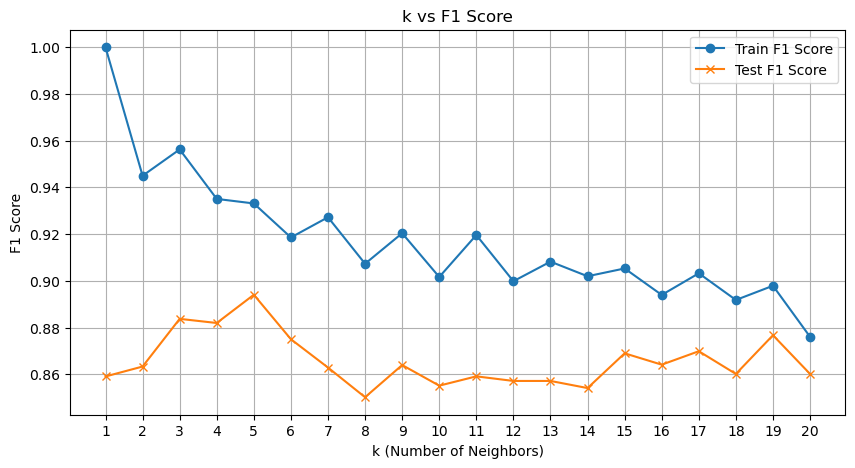

Best f1 score : 0.8940397350993378
Best k value : 5

K-NN Accuracy:
Training: 0.9462227912932138
Testing : 0.9047619047619048
K-NN Confusion Matrix (Test):
[[169  13]
 [ 19 135]]


In [77]:
import matplotlib.pyplot as plt

#Creating the k-NN model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)

#Training the model on the training data
knn.fit(X_train, y_train)

#Making predictions for both training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#Calculating F1 scores for both sets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

#Printing the results
print("F1 Score on Training Set (k=5):", f1_train)
print("F1 Score on Testing Set (k=5):", f1_test)

#Trying different values of k and store F1 scores
k_values = list(range(1, 21))  # Trying k from 1 to 20
train_scores = []
test_scores = []

for k in k_values:
    # Create and train model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Predict
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate F1 scores
    train_scores.append(f1_score(y_train, train_pred))
    test_scores.append(f1_score(y_test, test_pred))

#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(k_values, train_scores, marker='o', label="Train F1 Score")
plt.plot(k_values, test_scores, marker='x', label="Test F1 Score")
plt.title("k vs F1 Score")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

print(f"Best f1 score : {max(test_scores)}")
print(f"Best k value : {k_values[test_scores.index(max(test_scores))]}")

# Accuracy and Confusion Matrix for k-NN
acc_knn_train = accuracy_score(y_train, y_train_pred)
acc_knn_test = accuracy_score(y_test, y_test_pred)
cm_knn = confusion_matrix(y_test, y_test_pred)

print("\nK-NN Accuracy:")
print("Training:", acc_knn_train)
print("Testing :", acc_knn_test)
print("K-NN Confusion Matrix (Test):")
print(cm_knn)
 


## Part 3: Logistic regression and model comparison

In [79]:
#Create and training the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

#Predicting on training and testing sets
y_train_log = log_model.predict(X_train)
y_test_log = log_model.predict(X_test)

# F1 Scores
f1_train_log = f1_score(y_train, y_train_log)
f1_test_log = f1_score(y_test, y_test_log)

print("\nLogistic Regression Results:")
print("Training F1 Score:", f1_train_log)
print("Testing F1 Score :", f1_test_log)

# Accuracy and Confusion Matrix for Logistic Regression
acc_log_train = accuracy_score(y_train, y_train_log)
acc_log_test = accuracy_score(y_test, y_test_log)
cm_log = confusion_matrix(y_test, y_test_log)

print("\nLogistic Regression Accuracy:")
print("Training:", acc_log_train)
print("Testing :", acc_log_test)
print("Logistic Regression Confusion Matrix (Test):")
print(cm_log)

# Detailed report
print("\nClassification Report (Training - Logistic Regression):")
print(classification_report(y_train, y_train_log))

print("\nClassification Report (Testing - Logistic Regression):")
print(classification_report(y_test, y_test_log))


Logistic Regression Results:
Training F1 Score: 0.8813559322033898
Testing F1 Score : 0.8712871287128713

Logistic Regression Accuracy:
Training: 0.9014084507042254
Testing : 0.8839285714285714
Logistic Regression Confusion Matrix (Test):
[[165  17]
 [ 22 132]]

Classification Report (Training - Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       455
           1       0.89      0.88      0.88       326

    accuracy                           0.90       781
   macro avg       0.90      0.90      0.90       781
weighted avg       0.90      0.90      0.90       781


Classification Report (Testing - Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       182
           1       0.89      0.86      0.87       154

    accuracy                           0.88       336
   macro avg       0.88      0.88      0.88       336
weighted avg       0.88  